In [ ]:
#Importing relevant libraries
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib as mpl
# import seaborn as sns
# sns.set(style='ticks')
# sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#installing yfinace
!pip3 install yfinance --upgrade

In [ ]:

#construct a function to calculate the statistics of the portfolios
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [ ]:
#Construct a function to test for normality test
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

## Question 1

###Portfolio 1: Tech Sector



In [ ]:
#downloading and reading data
import yfinance as yf
symbols1=['NOK', 'TEL' ,'MSI', 'IBM', 'ORCL','HPQ']
numassets=len(symbols1)
portfolio_1=yf.download (symbols1,start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  6 of 6 completed


In [ ]:
#leading information of our dataset
portfolio_1['Adj Close'].head()

,HPQ,IBM,MSI,NOK,ORCL,TEL
Date,,,,,,
2010-01-04,15.282907,82.858459,26.318748,9.074541,21.112118,19.474327
2010-01-05,15.347013,81.857552,25.955505,9.006566,21.086626,19.186455
2010-01-06,15.204233,81.325775,26.318748,8.938594,20.780771,19.575466
2010-01-07,15.210058,81.044243,26.847113,9.054149,20.712809,19.209793
2010-01-08,15.323699,81.857552,25.625290,9.060946,20.967684,19.450983


In [ ]:
#tailing information of our dataset
portfolio_1['Adj Close'].tail()

,HPQ,IBM,MSI,NOK,ORCL,TEL
Date,,,,,,
2019-12-23,19.176653,115.372299,156.788101,3.64,51.788067,91.557549
2019-12-24,19.204638,114.887146,156.285446,3.63,51.527725,91.673096
2019-12-26,19.297903,114.827568,155.995468,3.62,51.653072,91.779007
2019-12-27,19.148676,115.133980,156.063126,3.63,51.547009,91.971603
2019-12-30,19.111364,113.040176,155.589462,3.69,50.814198,92.039009


In [ ]:
#We now select the only column that we are interested in.
portfolio_1=portfolio_1['Adj Close']

### Characteristics of each Stock

,HPQ,IBM,MSI,NOK,ORCL,TEL
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.004186,-0.012154,-0.013898,-0.007519,-0.001208,-0.014892
2010-01-06,-0.009348,-0.006517,0.013898,-0.007576,-0.014611,0.020073
2010-01-07,0.000384,-0.003467,0.019877,0.012845,-0.003276,-0.018857
2010-01-08,0.007444,0.009985,-0.046579,0.000750,0.012230,0.012477


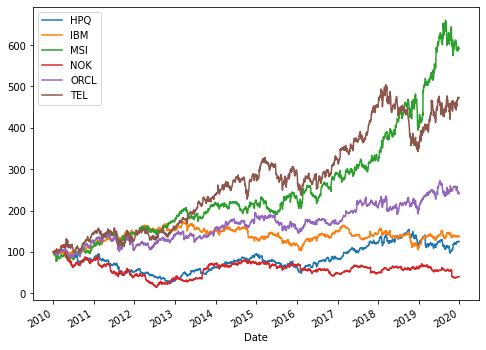

In [ ]:
#Log returns
#Here calculate and plot the returns.
(portfolio_1 / portfolio_1.iloc[0] * 100).plot(figsize=(8, 6))   
rets = np.log(portfolio_1 / portfolio_1.shift(1))
rets.head()

In [ ]:
# Statistics that describes each stocks
symbols1=['NOK', 'TEL' ,'MSI', 'IBM', 'ORCL','HPQ']  
for sym in symbols1:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    Portfolio_1= np.array(rets[sym].dropna())
    print_statistics(Portfolio_1)   



Results for symbol NOK
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.27022
           max         0.27218
          mean        -0.00036
           std         0.02676
          skew        -0.56452
      kurtosis        16.18300

Results for symbol TEL
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.09449
           max         0.06832
          mean         0.00062
           std         0.01498
          skew        -0.26153
      kurtosis         2.70586

Results for symbol MSI
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.13276
           max         0.13209
          mean         0.00071
           std         0.01444
          skew        -0.13592
      kurtosis         9.4138

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73caf10d0>,
      dtype=object)

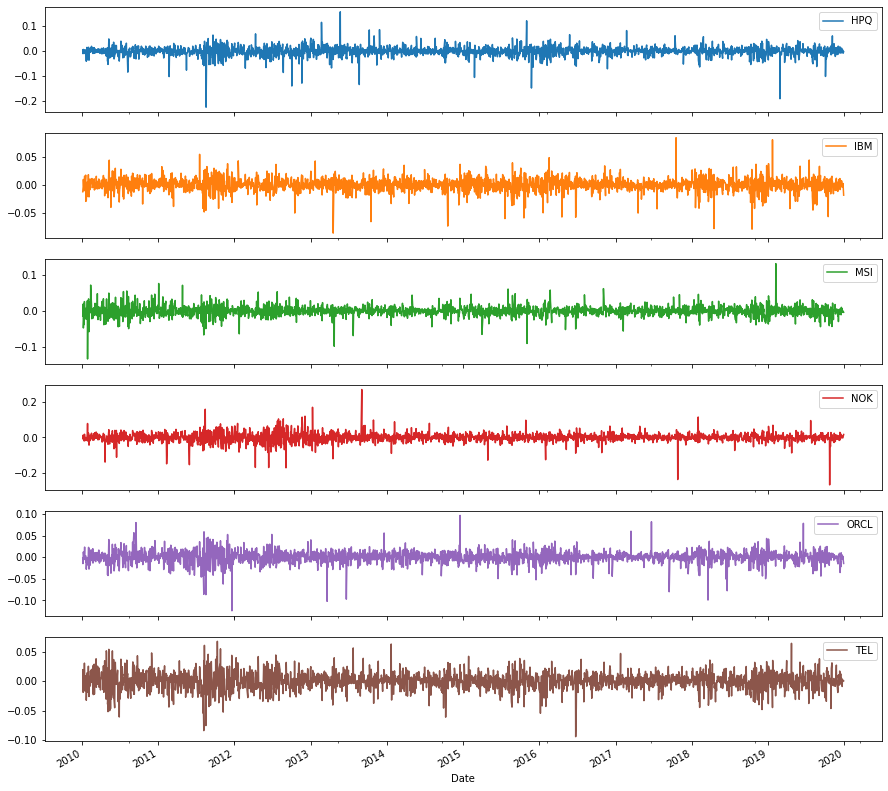

In [ ]:
#plot the log returns
rets.plot(subplots=True,figsize=(15, 15))

------------------------------


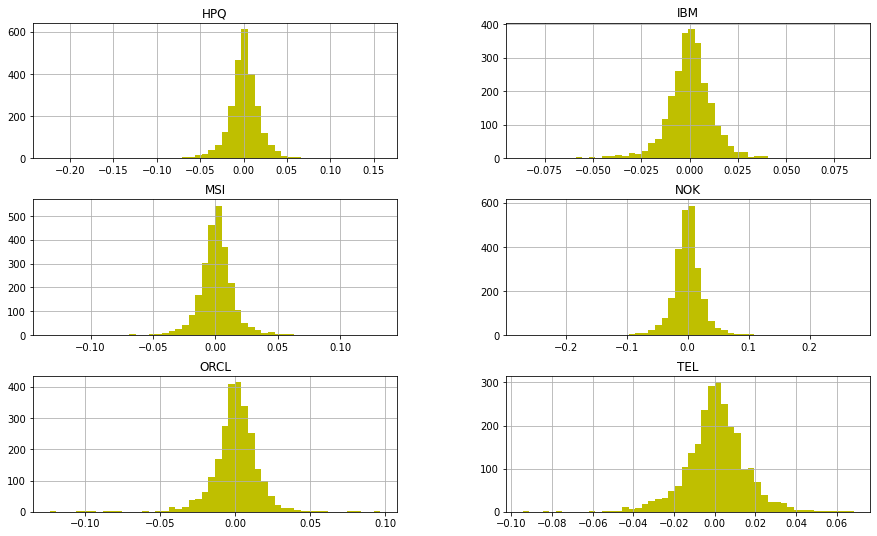

In [ ]:
#plotting the histogram for log returns
rets.hist(bins=50, figsize=(15, 9), color = 'y')
print (30 * "-")


### Portfolio 2: Energy sector of the NYSE.

In [ ]:
#Downloading and reading the data for portfolio 2
import yfinance as yf
symbols2=['CVX', 'TTE' ,'SHEL', 'BP', 'XOM','PTR']
numassets2=len(symbols2)
portfolio_2=yf.download (symbols2,start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  6 of 6 completed


In [ ]:
#Describing the leading data from the dataset
portfolio_2['Adj Close'].head()

,BP,CVX,PTR,SHEL,TTE,XOM
Date,,,,,,
2010-01-04,30.705379,48.459892,77.109482,31.911005,32.423088,43.185635
2010-01-05,30.923414,48.803143,80.088058,31.946833,32.496914,43.354256
2010-01-06,31.084330,48.809265,81.737907,31.685806,32.487080,43.728958
2010-01-07,31.073956,48.625370,81.038925,31.532280,32.413246,43.591576
2010-01-08,31.146616,48.711201,82.185020,31.486202,32.610111,43.416718


In [ ]:
#Describing the tailing data from the dataset
portfolio_2['Adj Close'].tail()

,BP,CVX,PTR,SHEL,TTE,XOM
Date,,,,,,
2019-12-23,33.258430,107.081696,41.921398,53.852951,46.233685,60.648563
2019-12-24,33.197338,107.090584,41.557461,53.761364,46.015289,60.415600
2019-12-26,33.144970,107.321976,42.031437,53.917061,46.292480,60.510506
2019-12-27,33.040253,107.054993,42.369987,54.118553,46.183285,60.303436
2019-12-30,32.813354,106.654549,41.955257,53.743046,46.275688,59.949669


In [ ]:
#Working only with the column we are interested in.
portfolio_2=portfolio_2['Adj Close']

### Characterstics of each stock for portfolio 2


,BP,CVX,PTR,SHEL,TTE,XOM
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.007076,0.007058,0.037901,0.001122,0.002274,0.003897
2010-01-06,0.005190,0.000125,0.020391,-0.008204,-0.000303,0.008606
2010-01-07,-0.000334,-0.003775,-0.008588,-0.004857,-0.002275,-0.003147
2010-01-08,0.002336,0.001764,0.014043,-0.001462,0.006055,-0.004019


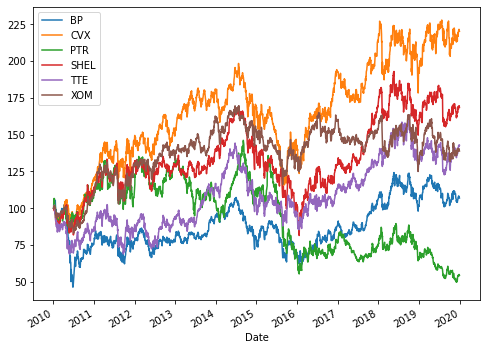

In [ ]:
#Calcualting and plotting returns
(portfolio_2 / portfolio_2.iloc[0] * 100).plot(figsize=(8, 6))   # takes care of all plotting functions in pandas
rets_2 = np.log(portfolio_2 / portfolio_2.shift(1))
rets_2.head()

In [ ]:
# Here describe and print the statistics for portfolio 2 for each stock
symbols2=['CVX', 'TTE' ,'SHEL', 'BP', 'XOM','PTR'] 
for sym in symbols2:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    Portfolio_2= np.array(rets_2[sym].dropna())
    print_statistics(Portfolio_2) 


Results for symbol CVX
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.07840
           max         0.06145
          mean         0.00031
           std         0.01327
          skew        -0.17902
      kurtosis         2.51178

Results for symbol TTE
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.09051
           max         0.07891
          mean         0.00014
           std         0.01521
          skew        -0.28010
      kurtosis         2.51229

Results for symbol SHEL
------------------------------
     statistic           value
------------------------------
          size      2514.00000
           min        -0.07313
           max         0.06328
          mean         0.00021
           std         0.01392
          skew        -0.26989
      kurtosis         2.722

In [ ]:
#creating an array for log returns
symbols2 = ['CVX', 'TTE' ,'SHEL', 'BP', 'XOM','PTR']
for sym in symbols2:
  print("")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73cabedd0>,
      dtype=object)

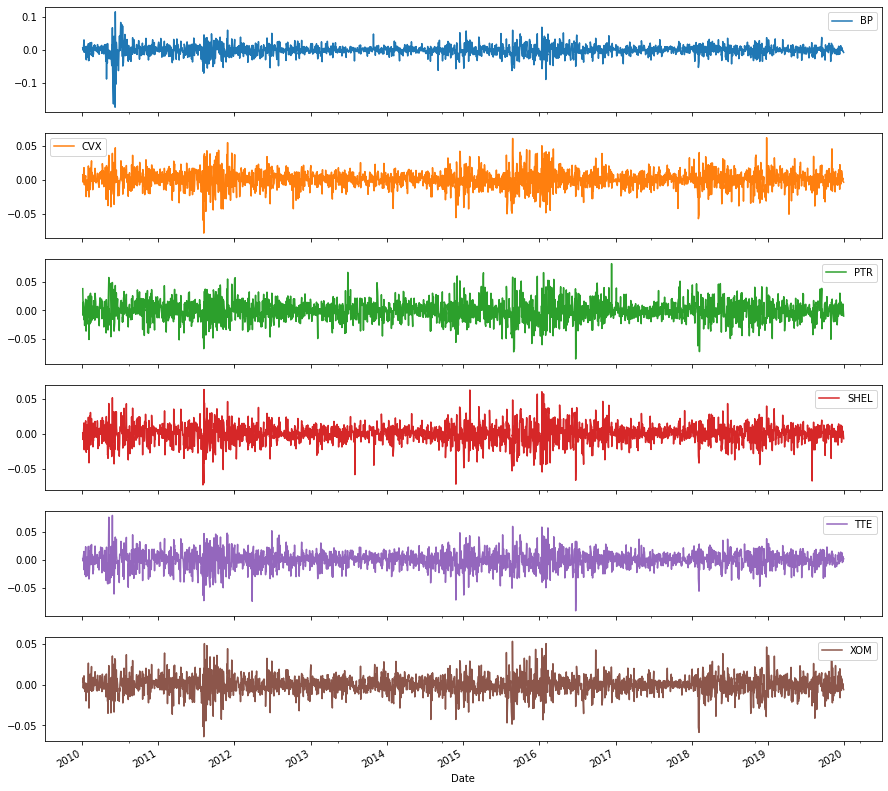

In [ ]:
#plot for log returns
rets_2.plot(subplots=True,figsize=(15, 15))

------------------------------


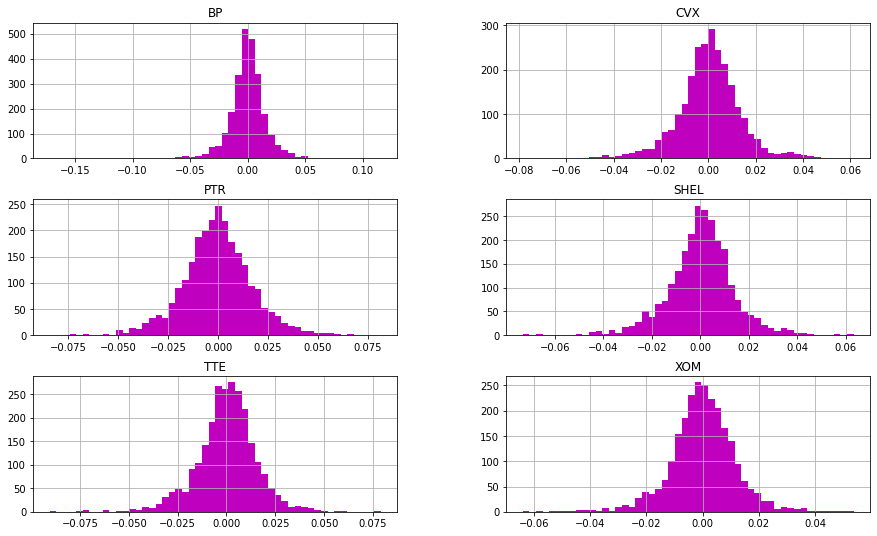

In [ ]:
#plotting the histogram for log returns
rets_2.hist(bins=50, figsize=(15, 9), color = 'm')
print (30 * "-")
#creating an array for log returns


## Question 2

### Portfolio 1

In [ ]:
# Here we define a function, to create a value of portfolio of $100000
def func_minimize_weights_1(weights_1):
  return np.sum(portfolio_1@weights_1)

bnds_1=tuple((0,1) for weights_1 in range (numassets))


cons_1=({'type':'eq','fun':lambda weights_1:np.sum(weights_1)-1},{'type':'eq','fun':lambda weights_1:np.sum(portfolio_1@weights_1)-100000})
opts_1=sco.minimize(func_minimize_weights_1,numassets*[1./numassets,],method='SLSQP',bounds=bnds_1,constraints=cons_1)
weights_1=opts_1['x']
print('portfolio =' ,np.sum(portfolio_1@opts_1['x']).round(3))
print('weights=',opts_1['x'])

portfolio = 100000.0
weights= [0.2018266  0.09999246 0.14768017 0.20924115 0.1792616  0.16199803]


In [ ]:
# weighted portfolio
port=portfolio_1@weights_1

In [ ]:
port.head()

Date
2010-01-04    24.094640
2010-01-05    23.888419
2010-01-06    23.854042
2010-01-07    23.857859
2010-01-08    23.867859
dtype: float64

In [ ]:
port.iloc[0]

24.094639792691538

### Time series for portfolio 1 


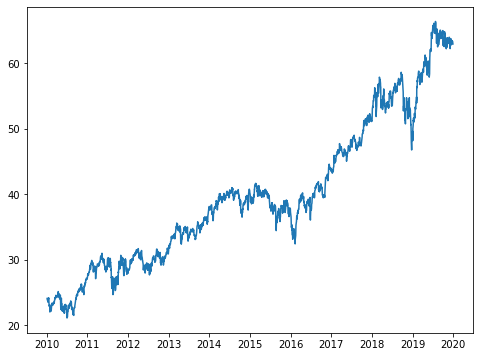

In [ ]:
# plotting time series for the portfolio 1
plt.figure(figsize=(8,6))
plt.plot(port.index,port)

In [ ]:
#Annual covariance matrix, 252 working days.
# variance 
np.sum(rets.cov()*252@weights_1)   


0.22564731462954668

In [ ]:
# Expected portfolio return
np.sum(rets.mean()*weights_1)*252  

0.056069754699021826

In [ ]:
#Anuual returns, 252 days working days.
rets.mean()*252    

HPQ     0.022408
IBM     0.031135
MSI     0.178118
NOK    -0.090199
ORCL    0.088042
TEL     0.155682
dtype: float64

In [ ]:
#correlation of the returns.
rets.corr()

,HPQ,IBM,MSI,NOK,ORCL,TEL
HPQ,1.000000,0.435648,0.311816,0.243859,0.415464,0.454257
IBM,0.435648,1.000000,0.346965,0.290904,0.523219,0.469847
MSI,0.311816,0.346965,1.000000,0.278123,0.381155,0.421541
NOK,0.243859,0.290904,0.278123,1.000000,0.297715,0.374821
ORCL,0.415464,0.523219,0.381155,0.297715,1.000000,0.528165
TEL,0.454257,0.469847,0.421541,0.374821,0.528165,1.000000


In [ ]:
# variance
var=weights_1.T@(rets.cov()*252@weights_1)   

In [ ]:
# votality
std=np.sqrt(var); std   

0.1997975628519158

In [ ]:
# calculate the returns for portfolio 1 and portfolio 2
rets1 = np.log(port/port.shift(1))
#rets2 = np.log(port_2/port_2.shift(1))

In [ ]:
data = pd.DataFrame(rets1.values,columns=["ret"])
data["rets1"]= rets1.values


In [ ]:
#covariance matrix
data.cov()*252

,ret,rets1
ret,0.039698,0.039698
rets1,0.039698,0.039698


### Portfolio 2

In [ ]:
# define a function, to create a portfolio of value $100000
def func_minimize_weights_2(weights_2):
  return np.sum(portfolio_2@weights_2)

bnds_2=tuple((0,1) for weights_2 in range (numassets2))


cons_2=({'type':'eq','fun':lambda weights_2:np.sum(weights_2)-1},{'type':'eq','fun':lambda weights_2:np.sum(portfolio_2@weights_2)-100000})
res_2=sco.minimize(func_minimize_weights_2,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds_2,constraints=cons_2)
opts_2=sco.minimize(func_minimize_weights_2,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds_2,constraints=cons_2)
weights_2=opts_2['x']
print('portfolio sum=' ,np.sum(portfolio_2@opts_2['x']).round(3))
print('weights=',opts_2['x'])


portfolio sum= 100000.0
weights= [0.31654226 0.01051416 0.05167439 0.22465187 0.26875464 0.12786268]


In [ ]:
# weighted portfolio 2
port_2=portfolio_2@weights_2

In [ ]:
port_2.head()

Date
2010-01-04    41.915625
2010-01-05    42.481876
2010-01-06    42.762936
2010-01-07    42.571613
2010-01-08    42.761438
dtype: float64

In [ ]:
port_2.iloc[0]

41.915624960541074

### Time series for portfolio 2


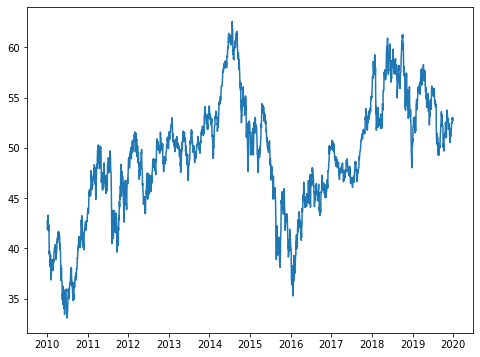

In [ ]:
# plotting time series for portfolio 2
plt.figure(figsize=(8,6))
plt.plot(port_2.index,port_2)

In [ ]:
#Annual returns
rets_2.mean()*252  

BP      0.006656
CVX     0.079074
PTR    -0.061008
SHEL    0.052251
TTE     0.035660
XOM     0.032878
dtype: float64

In [ ]:
#Annual covariance matrix
rets_2.cov()*252  

,BP,CVX,PTR,SHEL,TTE,XOM
BP,0.066723,0.034588,0.036264,0.040890,0.042803,0.030248
CVX,0.034588,0.044407,0.032951,0.033918,0.035887,0.031297
PTR,0.036264,0.032951,0.076542,0.035056,0.039704,0.029160
SHEL,0.040890,0.033918,0.035056,0.048839,0.042964,0.028636
TTE,0.042803,0.035887,0.039704,0.042964,0.058336,0.030611
XOM,0.030248,0.031297,0.029160,0.028636,0.030611,0.034416


In [ ]:
#Returns correlation.
rets_2.corr()

,BP,CVX,PTR,SHEL,TTE,XOM
BP,1.000000,0.635416,0.507441,0.716310,0.686075,0.631208
CVX,0.635416,1.000000,0.565197,0.728322,0.705096,0.800567
PTR,0.507441,0.565197,1.000000,0.573357,0.594185,0.568151
SHEL,0.716310,0.728322,0.573357,1.000000,0.804919,0.698467
TTE,0.686075,0.705096,0.594185,0.804919,1.000000,0.683178
XOM,0.631208,0.800567,0.568151,0.698467,0.683178,1.000000


In [ ]:
# Expected portfolio return
np.sum(rets_2.mean()*weights_2)*252 

0.025311411589126812

In [ ]:
# variance
var=weights_2.T@(rets_2.cov()*252@weights_2)    

In [ ]:
# volatility
std=np.sqrt(var); std   

0.2069330805967602

In [ ]:
# calculate the returns for portfolio 1 and portfolio 2
rets1 = np.log(port/port.shift(1))
rets2 = np.log(port_2/port_2.shift(1))

In [ ]:
data = pd.DataFrame(rets1.values,columns=["ret"])
data["rets2"]= rets2.values


In [ ]:
#covariance matrix
data.cov()*252

,ret,rets2
ret,0.027945,0.021248
rets2,0.021248,0.037476


In [ ]:
#mean 

data.mean()*252

ret      0.096231
rets2    0.023018
dtype: float64

# Question 3

###Portfolio 1

In [ ]:
#downloading and reading data
import yfinance as yf
symbols1=['NOK', 'TEL' ,'MSI', 'IBM', 'ORCL','HPQ']
numassets=len(symbols1)
portfolio_1=yf.download (symbols1,start="2010-01-01",end="2015-12-31")

[*********************100%***********************]  6 of 6 completed


In [ ]:
#We now select the only column that we are interested in.
portfolio_1=portfolio_1['Adj Close']

In [ ]:
# calculate returns
rets = np.log(portfolio_1 / portfolio_1.shift())

In [ ]:
# create empty list for portfolio returns and volatility
prets=[]
pvols=[]

In [ ]:
# calculate the weights
for p in range(2500):
  weights_1=np.random.random(numassets)
  weights_1=weights_1/np.sum(weights_1)
  prets.append(np.sum(rets.mean()*weights_1)*252)
  pvols.append(np.sqrt(weights_1.T@(rets.cov()*252@weights_1)))

In [ ]:
# Change from prets as list to prets as numpy array
prets=np.array(prets)
pvols=np.array(pvols)

In [ ]:
# plt.figure(figsize=(8,4))
# plt.scatter(pvols,prets,c=prets/pvols,marker='o')   # c is a sequence of numbers which will be mapped to colors
# plt.grid='true'
# plt.xlabel('expected volatiity')
# plt.ylabel('expected returns')
# plt.colorbar(label='Sharpe Ratio')
# plt.title('Sharpe Ratios by colour')

# Changing prets,pvols to the real stock inputs and minimizing var and Sharpe Ratio

In [ ]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(weights_1):
  prets=np.sum(rets.mean()*weights_1)*252
  pvols=np.sqrt(weights_1.T@(rets.cov()*252@weights_1))
  srs=prets/pvols  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([prets,pvols,srs])

In [ ]:
# Functions that we will minimize
def func_to_maximize_sharpe(weights_1):
  return(-stats(weights_1)[2])   
def func_to_minimize_var(weights_1):
  return((stats(weights_1)[1])**2)
def func_to_minimize_std(weights_1):
  return(stats(weights_1)[1])

In [ ]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds=tuple((0,1) for x in range(numassets))   # components of x between 0 and 1

In [ ]:
# y=numassets*[1./numassets,] # Creates a list of numassets x 1/numassets - used for starting values in optimizer
# print(np.array(y))
# func_to_maximize_sharpe(np.array(y))

In [ ]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

## Maximizing Sharpe, minimizing -Sharpe, details in variable opts

In [ ]:
%%time
# Maximize Sharpe ratio
opts=sco.minimize(func_to_maximize_sharpe,numassets*[1./numassets,],method='SLSQP',bounds=bnds,constraints=cons)

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 112 ms


In [ ]:
# opts

In [ ]:
# opts['x'].round(3)   # x is the optimized portfolio with criterion the Sharpe Ratio

In [ ]:
# stats(opts['x']).round(3)

## Minimum Variance Portfolio - details in variable optv

In [ ]:
%%time
# Minimize variance
optv=sco.minimize(func_to_minimize_var,numassets*[1./numassets,],method='SLSQP',bounds=bnds,constraints=cons)

CPU times: user 271 ms, sys: 1.91 ms, total: 273 ms
Wall time: 295 ms


In [ ]:
# optv

In [ ]:
# stats(optv['x']).round(3)

##  EFFICIENT FRONTIER 

In [ ]:
%%time
trets=np.linspace(0.0,0.18,50)
tvols=[]
for tret in trets:
  cons=({'type': 'eq','fun': lambda x: stats(x)[0]-tret},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res=sco.minimize(func_to_minimize_std,numassets*[1./numassets,],method='SLSQP',bounds=bnds,constraints=cons)
  tvols.append(res['fun'])
tvols=np.array(tvols)

CPU times: user 17.5 s, sys: 87.8 ms, total: 17.6 s
Wall time: 25.7 s


Text(0.5, 1.0, 'Efficient Frontier - red star opt Sharpe Ratio')

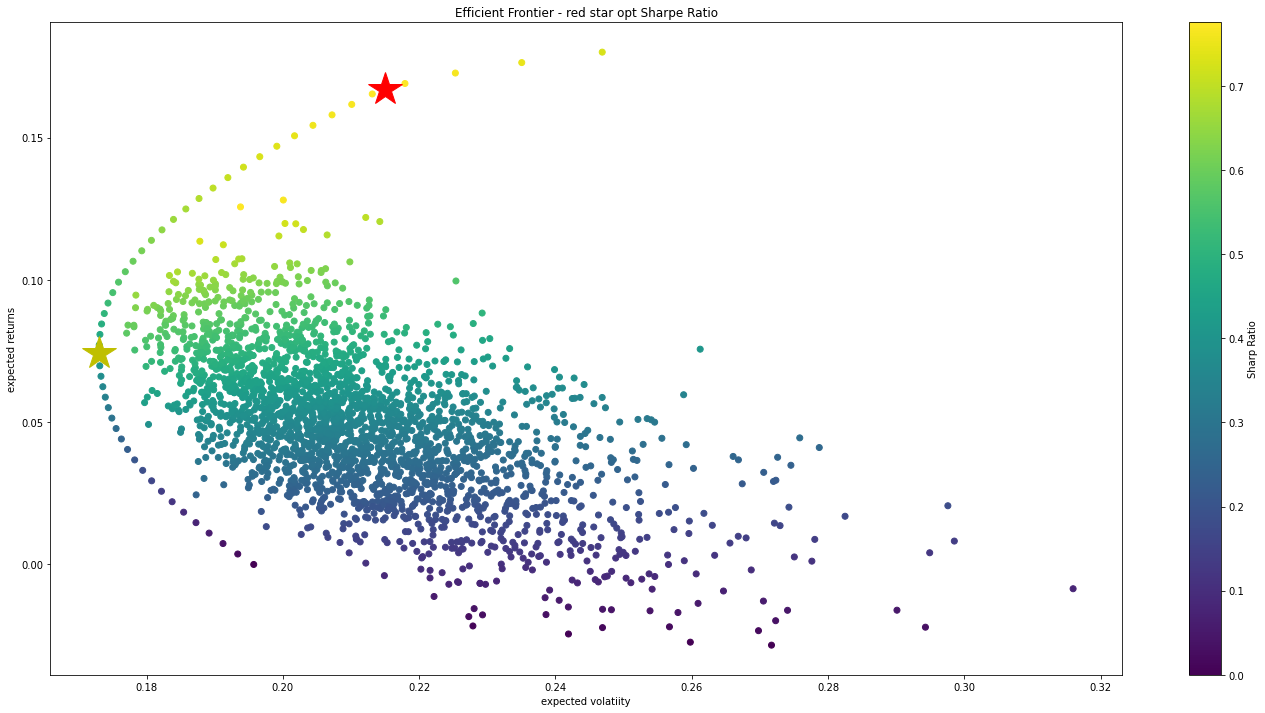

In [ ]:

plt.figure(figsize=(24,12))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='o')
# plt.plot(x,cml(x,slopes[np.argmax(slopes)],0.02))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=35.0)  # portfolio with highest Sharpe ratio
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=35.0)  # portfolio with min variance
plt.grid=True
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharp Ratio')
plt.title('Efficient Frontier - red star opt Sharpe Ratio')

## Plot Capital Market Line (CML) - rf rate

In [ ]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind=np.argmin(tvols)
evols=tvols[ind:]
erets=trets[ind:]

In [ ]:
#risk free rate and calculating the slopes
r0=.02
slopes=(erets-r0)/evols

In [ ]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons=({'type': 'eq','fun': lambda x: stats(x)[0]-erets[np.argmax(slopes)]},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
res=sco.minimize(func_to_minimize_std,numassets*[1./numassets,],method='SLSQP',bounds=bnds,constraints=cons)

In [ ]:
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts=np.linspace(0,0.4,100)

In [ ]:
print((erets[np.argmax(slopes)],evols[np.argmax(slopes)]))

(0.1689795918367347, 0.21792455598213262)


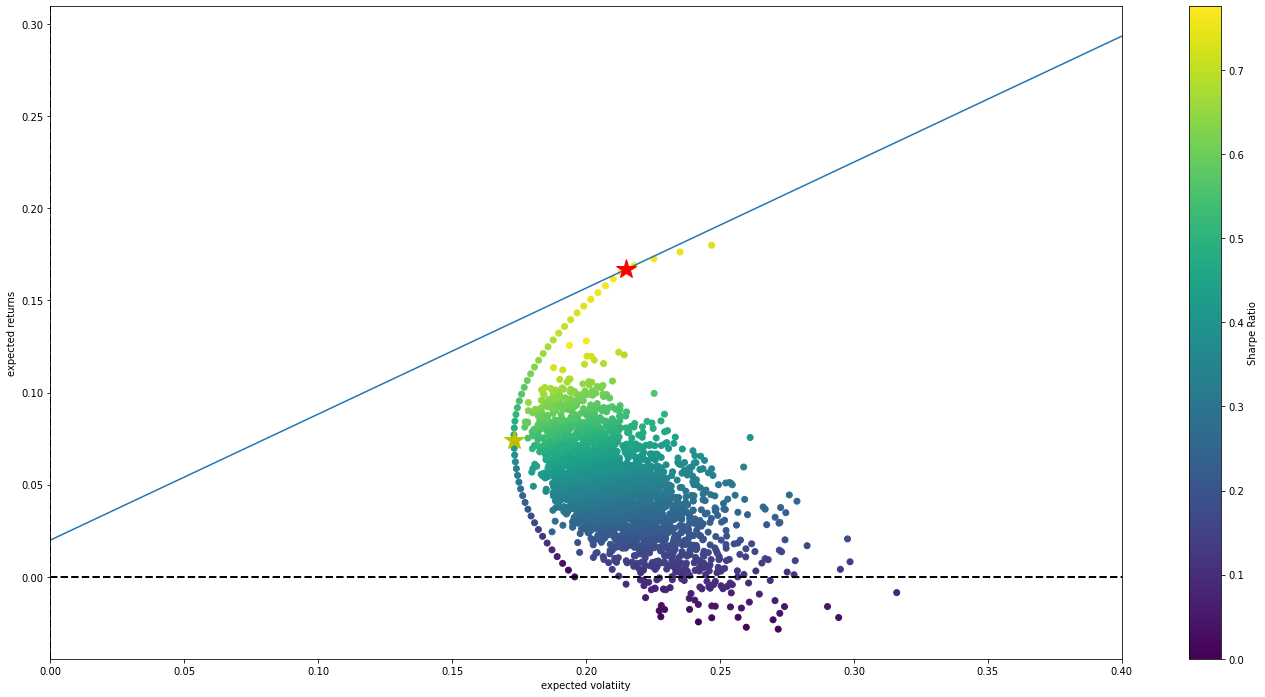

In [ ]:
#Plot for the market line
plt.figure(figsize=(24,12))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='o')
plt.plot(sgpts,cml(sgpts,slopes[np.argmax(slopes)],0.02))
plt.plot(stats(opts['x'])[1],stats(opts['x'])[0],'r*',markersize=20.0)
plt.plot(stats(optv['x'])[1],stats(optv['x'])[0],'y*',markersize=20.0)  
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe Ratio')
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)

In [ ]:
# res['x'].round(3)

In [ ]:
# mean=np.sum(rets.mean()*res['x'])*252 ; mean    # Portfolio return annualised

In [ ]:
# var=res['x'].T@(rets.cov()*252@res['x']) 
# np.sqrt(var)  # Portfolio volatility

###For portfolio 2

In [ ]:
#Downloading and reading the data
import yfinance as yf
symbols2=['CVX', 'TTE' ,'SHEL', 'BP', 'XOM','PTR']
numassets2=len(symbols2)
portfolio_2=yf.download (symbols2,start="2010-01-01",end="2015-12-31")

[*********************100%***********************]  6 of 6 completed


In [ ]:
portfolio_2=portfolio_2['Adj Close']

In [ ]:
#Returns
rets_2 = np.log(portfolio_2 / portfolio_2.shift())


In [ ]:
#create an empty list for portfolio returns and volatility
prets_2=[]
pvols_2=[]

In [ ]:
#alculate our weights
for p in range(2500):
  weights_2=np.random.random(numassets2)
  weights_2=weights_2/np.sum(weights_2)
  prets_2.append(np.sum(rets_2.mean()*weights_2)*252)
  pvols_2.append(np.sqrt(weights_2.T@(rets_2.cov()*252@weights_2)))

In [ ]:
prets_2=np.array(prets_2)  # Change from prets as list to prets as numpy array
pvols_2=np.array(pvols_2)

# Changing prets,pvols to the real stock inputs and minimizing var and Sharpe Ratio

In [ ]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(weights_2):
  prets_2=np.sum(rets_2.mean()*weights_2)*252
  pvols_2=np.sqrt(weights_2.T@(rets_2.cov()*252@weights_2))
  srs_2=prets_2/pvols_2  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([prets_2,pvols_2,srs_2])

In [ ]:
# Functions that we will minimize
def func_to_maximize_sharpe(weights_2):
  return(-stats(weights_2)[2])   # Note that minimizing minus the ratio gives us the max on changin sign
def func_to_minimize_var(weights_2):
  return((stats(weights_2)[1])**2)
def func_to_minimize_std(weights_2):
  return(stats(weights_2)[1])

In [ ]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons_2=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds_2=tuple((0,1) for x in range(numassets2))   # components of x between 0 and 1

In [ ]:
y_2 =numassets2*[1./numassets2,] # Creates a list of numassets x 1/numassets - used for starting values in optimizer
print(np.array(y_2))
func_to_maximize_sharpe(np.array(y_2))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


0.023257584116954465

In [ ]:
bnds_2

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

## Maximizing Sharpe, minimizing -Sharpe, details in variable opts

In [ ]:
%%time
# Maximize Sharpe ratio
opts_2=sco.minimize(func_to_maximize_sharpe,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds_2,constraints=cons_2)

CPU times: user 83.9 ms, sys: 0 ns, total: 83.9 ms
Wall time: 87.3 ms


In [ ]:
opts_2

     fun: -0.2722054248896276
     jac: array([ 5.69616314e-01, -8.92207026e-05,  5.70075013e-01,  2.22448997e-01,
        3.07196610e-01,  1.51220709e-04])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.48013360e-16, 6.28937087e-01, 3.36954850e-16, 0.00000000e+00,
       0.00000000e+00, 3.71062913e-01])

In [ ]:
opts_2['x'].round(3)   # x is the optimized portfolio with criterion the Sharpe Ratio

array([0.   , 0.629, 0.   , 0.   , 0.   , 0.371])

In [ ]:
stats(opts_2['x']).round(3)

array([0.054, 0.198, 0.272])

## Minimum Variance Portfolio - details in variable optv

In [ ]:
%%time
# Minimize variance
optv_2=sco.minimize(func_to_minimize_var,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds_2,constraints=cons_2)

CPU times: user 210 ms, sys: 789 µs, total: 211 ms
Wall time: 212 ms


In [ ]:
# optv_2

In [ ]:
stats(optv_2['x']).round(3)

array([0.033, 0.186, 0.178])

## Find all optimal returns for given volatilities minimizing vol or std - EFFICIENT FRONTIER - details in variable res, EF in tvols, trets

In [ ]:
%%time
trets_2=np.linspace(0.0,0.05,100)
tvols_2=[]
for tret_2 in trets_2:
  cons_2=({'type': 'eq','fun': lambda x: stats(x)[0]-tret_2},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res_2=sco.minimize(func_to_minimize_std,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds_2,constraints=cons_2)
  tvols_2.append(res_2['fun'])
tvols_2=np.array(tvols_2)

CPU times: user 22.4 s, sys: 60.2 ms, total: 22.5 s
Wall time: 22.5 s


Text(0.5, 1.0, 'Efficient Frontier - red star opt Sharpe Ratio')

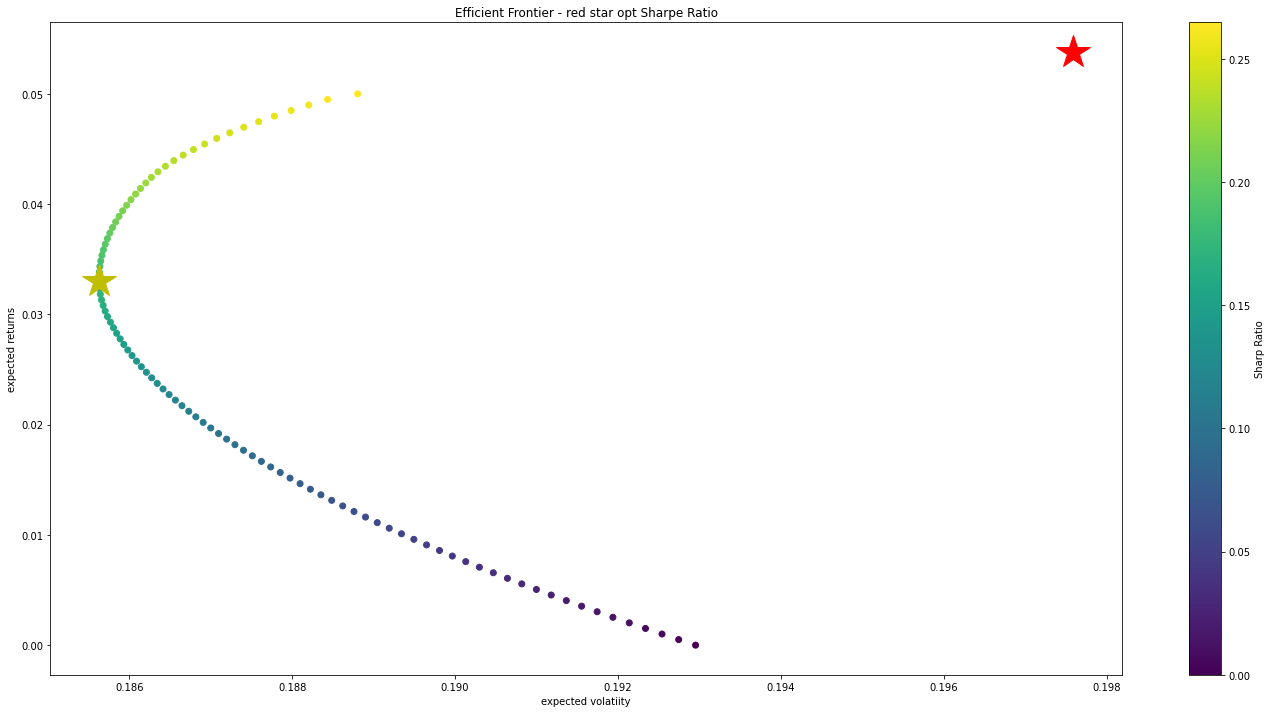

In [ ]:

plt.figure(figsize=(24,12))
#plt.scatter(pvols_2,prets_2,c=prets_2/pvols_2,marker='o')
plt.scatter(tvols_2,trets_2,c=trets_2/tvols_2,marker='o')
#plt.plot(x,cml(x,slopes[np.argmax(slopes)],0.05))
plt.plot(stats(opts_2['x'])[1],stats(opts_2['x'])[0],'r*',markersize=35.0)  
plt.plot(stats(optv_2['x'])[1],stats(optv_2['x'])[0],'y*',markersize=35.0)  
plt.grid=True
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharp Ratio')
plt.title('Efficient Frontier - red star opt Sharpe Ratio')

In [ ]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind_2=np.argmin(tvols_2)
evols_2=tvols_2[ind:]
erets_2=trets_2[ind:]

In [ ]:
#risk free rate
r0=.02
slopes_2=(erets_2-r0)/evols_2

In [ ]:
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts_2=np.linspace(0,0.4,100)

In [ ]:
cons_2=({'type': 'eq','fun': lambda x: stats(x)[0]-erets_2[np.argmax(slopes)]},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
res_2=sco.minimize(func_to_minimize_std,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds_2,constraints=cons_2)

In [ ]:
print((erets_2[np.argmax(slopes)],evols_2[np.argmax(slopes_2)]))

(0.023232323232323233, 0.18880431339190315)


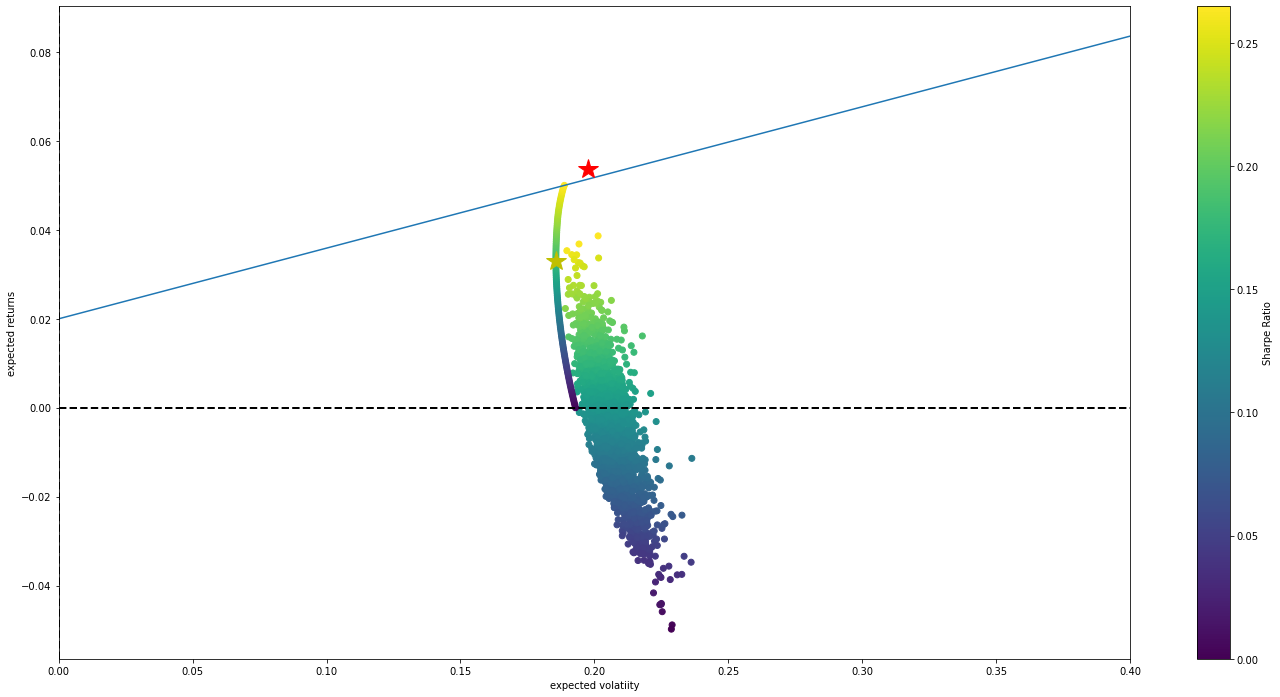

In [ ]:
plt.figure(figsize=(24,12))
plt.scatter(pvols_2,prets_2,c=prets_2/pvols_2,marker='o')
plt.scatter(tvols_2,trets_2,c=trets_2/tvols_2,marker='o')
plt.plot(sgpts_2,cml(sgpts_2,slopes_2[np.argmax(slopes_2)],0.02))
plt.plot(stats(opts_2['x'])[1],stats(opts_2['x'])[0],'r*',markersize=20.0)  # portfolio with min variance
plt.plot(stats(optv_2['x'])[1],stats(optv_2['x'])[0],'y*',markersize=20.0)  # portfolio with min variance
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe Ratio')
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)

**Question 4**

**For Portfolio 1**

In [ ]:
#downloading and reading data
import yfinance as yf
symbols_1=['NOK', 'CVX' ,'MSI', 'IBM', 'BP','SHEL']
numassets_1=len(symbols_1)
portfolio1=yf.download (symbols_1,start="2016-01-01",end="2019-12-31")

[*********************100%***********************]  6 of 6 completed


In [ ]:
#leading information of our dataset
portfolio1['Adj Close'].head()

,BP,CVX,IBM,MSI,NOK,SHEL
Date,,,,,,
2016-01-04,20.928896,67.363174,97.209618,60.018902,6.218946,32.296070
2016-01-05,20.841303,67.939369,97.138138,59.357277,6.192962,32.141026
2016-01-06,20.416794,65.255455,96.651909,58.498974,6.132331,31.020573
2016-01-07,19.830568,62.943066,95.000153,57.318813,6.184300,29.681641
2016-01-08,19.480183,62.268272,94.120651,57.443970,6.348868,28.455488


In [ ]:
#tailing information of our dataset
portfolio1['Adj Close'].tail()

,BP,CVX,IBM,MSI,NOK,SHEL
Date,,,,,,
2019-12-23,33.258430,107.081696,115.372299,156.788101,3.64,53.852951
2019-12-24,33.197342,107.090584,114.887146,156.285461,3.63,53.761360
2019-12-26,33.144978,107.321968,114.827568,155.995468,3.62,53.917057
2019-12-27,33.040253,107.054993,115.133987,156.063095,3.63,54.118549
2019-12-30,32.813351,106.654549,113.040176,155.589478,3.69,53.743053


In [ ]:
#We now select the only column that we are interested in.
portfolio1=portfolio1['Adj Close']

,BP,CVX,IBM,MSI,NOK,SHEL
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.004194,0.008517,-0.000736,-0.011085,-0.004187,-0.004812
2016-01-06,-0.020579,-0.040306,-0.005018,-0.014566,-0.009839,-0.035483
2016-01-07,-0.029133,-0.036079,-0.017237,-0.020380,0.008439,-0.044122
2016-01-08,-0.017827,-0.010779,-0.009301,0.002181,0.026263,-0.042188


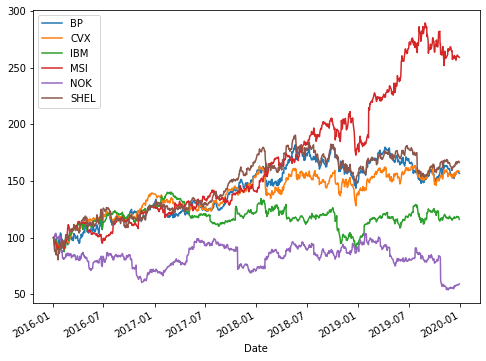

In [ ]:
#calculate and plot the returns.
(portfolio1 / portfolio1.iloc[0] * 100).plot(figsize=(8, 6))   # takes care of all plotting functions in pandas
rets1 = np.log(portfolio1 / portfolio1.shift(1))
rets1.head()

In [ ]:
def func_minimize_weights1(weights1):
  return np.sum(portfolio1@weights1)

bnds_1=tuple((0,1) for weights1 in range (numassets_1))


cons_1=({'type':'eq','fun':lambda weights1:np.sum(weights1)-1},{'type':'eq','fun':lambda weights1:np.sum(portfolio1@weights1)-100000})
res_1=sco.minimize(func_minimize_weights1,numassets_1*[1./numassets_1,],method='SLSQP',bounds=bnds_1,constraints=cons_1)
opts_1=sco.minimize(func_minimize_weights1,numassets_1*[1./numassets_1,],method='SLSQP',bounds=bnds_1,constraints=cons_1)
weights1=opts_1['x']
print('portfolio sum=' ,np.sum(portfolio1@opts_1['x']).round(3))
print('weights=',opts_1['x'])


portfolio sum= 100000.0
weights= [1.68847542e-25 2.68285376e-01 3.57696997e-01 2.99085199e-01
 4.64505485e-25 7.49324280e-02]


In [ ]:
# weights1=np.random.random(numassets_1)  # A single randomly selected portfolio
# weights1=weights1/np.sum(weights1)   # weights must sum to 1
# weights1


In [ ]:
port1=portfolio1@weights1

In [ ]:
#Annual covariance matrix, 252 working days.
# variance 
np.sum(rets1.cov()*252@weights1)   


0.12001751848757394

In [ ]:
np.sum(rets1.mean()*weights1)*252  # Expected portfolio return

0.12557356995761423

In [ ]:
var=weights1.T@(rets1.cov()*252@weights1)  # variance  
var

0.02172604920522411

In [ ]:
std=np.sqrt(var); std   # std also called volatility

0.14739758887181334

In [ ]:
prets1=[]
pvols1=[]

In [ ]:
for p in range(2500):
  weights1=np.random.random(numassets_1)
  weights1=weights1/np.sum(weights1)
  prets1.append(np.sum(rets1.mean()*weights1)*252)
  pvols1.append(np.sqrt(weights1.T@(rets1.cov()*252@weights1)))

In [ ]:
prets1=np.array(prets1)  # Change from prets as list to prets as numpy array
pvols1=np.array(pvols1)

In [ ]:
# Function to calculate statistics of rets and vols - the new prets,pvols
def stats(weights1):
  prets1=np.sum(rets1.mean()*weights1)*252
  pvols1=np.sqrt(weights1.T@(rets1.cov()*252@weights1))
  srs1=prets1/pvols1  # Sharpe ratios (Sharpe ratio is return/volatility(std))
  return np.array([prets1,pvols1,srs1])

In [ ]:
# Functions that we will minimize
def func_to_maximize_sharpe(weights1):
  return(-stats(weights1)[2])   # Note that minimizing minus the ratio gives us the max on changin sign
def func_to_minimize_var(weights1):
  return((stats(weights1)[1])**2)
def func_to_minimize_std(weights1):
  return(stats(weights1)[1])

In [ ]:
# Set up constraints dictionary and bounds for variables for use in optimizer
cons1=({'type': 'eq','fun': lambda x: np.sum(x)-1})  # equality constraint components of x add up to 1
bnds1=tuple((0,1) for x in range(numassets_1))   # components of x between 0 and 1

In [ ]:
y1 =numassets_1*[1./numassets_1,] # Creates a list of numassets x 1/numassets - used for starting values in optimizer
print(np.array(y1))
func_to_maximize_sharpe(np.array(y1))

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


-0.5393348028425126

In [ ]:
bnds1

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [ ]:
%%time
# Maximize Sharpe ratio
opts1=sco.minimize(func_to_maximize_sharpe,numassets_1*[1./numassets_1,],method='SLSQP',bounds=bnds1,constraints=cons1)

CPU times: user 99.6 ms, sys: 0 ns, total: 99.6 ms
Wall time: 101 ms


In [ ]:
opts1

     fun: -1.2121983509214047
     jac: array([-9.41902399e-05,  6.90668821e-05,  2.99624220e-01,  3.01003456e-06,
        1.55887790e+00, -4.44650650e-05])
 message: 'Optimization terminated successfully.'
    nfev: 65
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([2.77190210e-02, 1.04859609e-01, 3.73507648e-17, 7.14686473e-01,
       0.00000000e+00, 1.52734897e-01])

In [ ]:
opts1['x'].round(3)   # x is the optimized portfolio with criterion the Sharpe Ratio

array([0.028, 0.105, 0.   , 0.715, 0.   , 0.153])

In [ ]:
stats(opts1['x']).round(3)

array([0.206, 0.17 , 1.212])

In [ ]:
%%time
# Minimize variance
optv1=sco.minimize(func_to_minimize_var,numassets_1*[1./numassets_1,],method='SLSQP',bounds=bnds1,constraints=cons1)

CPU times: user 271 ms, sys: 1.76 ms, total: 273 ms
Wall time: 329 ms


In [ ]:
optv1

     fun: 0.020867864022446257
     jac: array([0.04151686, 0.04197557, 0.04174386, 0.0416553 , 0.04186431,
       0.04176701])
 message: 'Optimization terminated successfully.'
    nfev: 104
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.13642824, 0.19623227, 0.2642815 , 0.32165672, 0.04081941,
       0.04058185])

In [ ]:
stats(optv1['x']).round(3)

array([0.125, 0.144, 0.864])

In [ ]:
%%time
trets1=np.linspace(0.0,0.25,50)
tvols1=[]
for tret1 in trets1:
  cons1=({'type': 'eq','fun': lambda x: stats(x)[0]-tret1},
        {'type': 'eq','fun': lambda x: np.sum(x)-1})
  res1=sco.minimize(func_to_minimize_std,numassets_1*[1./numassets_1,],method='SLSQP',bounds=bnds1,constraints=cons1)
  tvols1.append(res1['fun'])
tvols1=np.array(tvols1)

CPU times: user 9.48 s, sys: 44.3 ms, total: 9.52 s
Wall time: 9.52 s


In [ ]:
# Picks out the efficient fronties (evols,erets) - argmin is the index of the vertex of the 
# hyperbola/parabola
ind1=np.argmin(tvols1)
evols1=tvols1[ind1:]
erets1=trets1[ind1:]

In [ ]:
r0=.02
slopes1=(erets1-r0)/evols1

In [ ]:
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts1=np.linspace(0,0.4,100)

In [ ]:
print((erets1[np.argmax(slopes1)],evols1[np.argmax(slopes1)]))

(0.25, 0.20807256182760112)


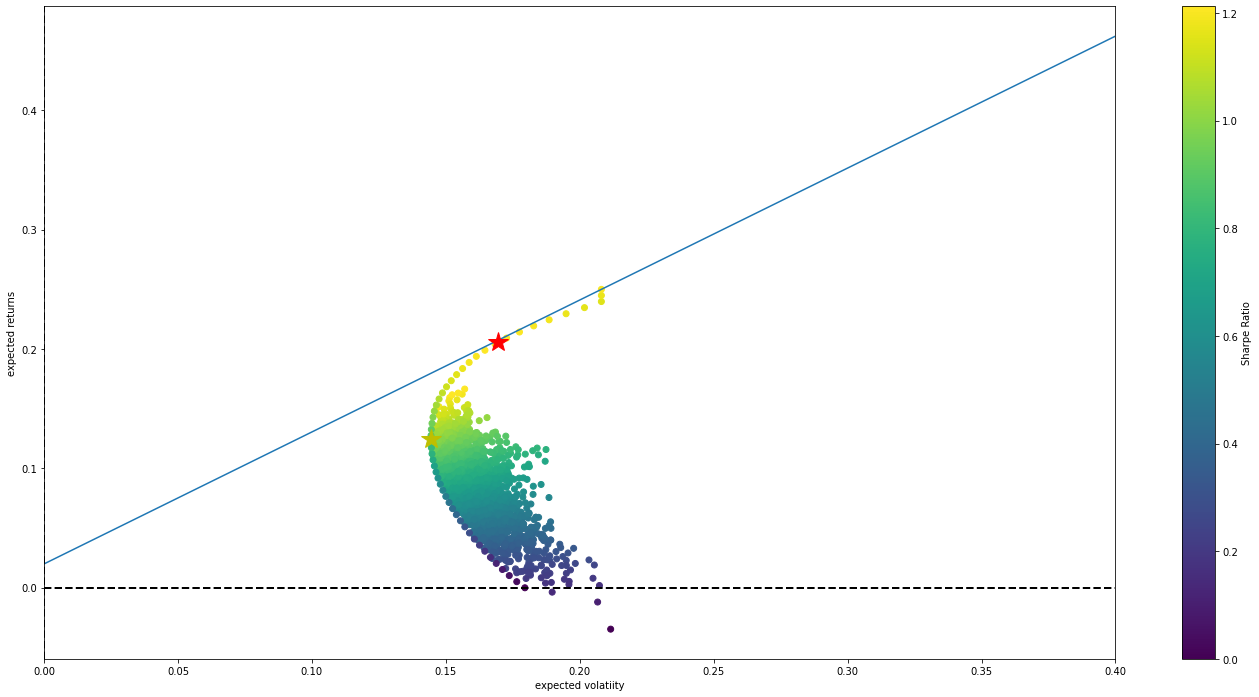

In [ ]:
plt.figure(figsize=(24,12))
plt.scatter(pvols1,prets1,c=prets1/pvols1,marker='o')
plt.scatter(tvols1,trets1,c=trets1/tvols1,marker='o')
plt.plot(sgpts1,cml(sgpts1,slopes1[np.argmax(slopes1)],0.02))
plt.plot(stats(opts1['x'])[1],stats(opts1['x'])[0],'r*',markersize=20.0)  # portfolio with min variance
plt.plot(stats(optv1['x'])[1],stats(optv1['x'])[0],'y*',markersize=20.0)  # portfolio with min variance
plt.grid='true'
plt.xlim(0.0,0.4)
plt.xlabel('expected volatiity')
plt.ylabel('expected returns')
plt.colorbar(label='Sharpe Ratio')
plt.axhline(0,color='k',ls='--',lw=2.0)
plt.axvline(0,color='k',ls='--',lw=2.0)

**For Portfolio 2**

In [ ]:
#Downloading and reading the data
import yfinance as yf
symbols2=['IBM', 'NOK' ,'MSI', 'GLD', 'LQD','^IRX']
numassets2=len(symbols2)
portfolio2=yf.download (symbols2,start="2016-01-01",end="2019-12-31")

[*********************100%***********************]  6 of 6 completed


In [ ]:
#leading information of our dataset
portfolio2['Adj Close'].head()

,GLD,IBM,LQD,MSI,NOK,^IRX
Date,,,,,,
2016-01-04,102.889999,97.209610,94.334457,60.018898,6.218946,0.155
2016-01-05,103.180000,97.138138,94.384171,59.357288,6.192962,0.205
2016-01-06,104.669998,96.651894,94.756660,58.498962,6.132331,0.205
2016-01-07,106.150002,95.000145,94.831177,57.318802,6.184299,0.190
2016-01-08,105.680000,94.120651,94.905701,57.443966,6.348868,0.190


In [ ]:
#tailing information of our dataset
portfolio2['Adj Close'].tail()

,GLD,IBM,LQD,MSI,NOK,^IRX
Date,,,,,,
2019-12-23,139.949997,115.372299,120.953331,156.788132,3.64,1.520
2019-12-24,141.270004,114.887146,121.076431,156.285446,3.63,1.538
2019-12-26,142.380005,114.827560,121.294243,155.995468,3.62,1.535
2019-12-27,142.330002,115.134003,121.464706,156.063110,3.63,1.518
2019-12-30,142.630005,113.040169,121.682510,155.589478,3.69,1.490


In [ ]:
#We now select the only column that we are interested in.
portfolio2=portfolio2['Adj Close']

,GLD,IBM,LQD,MSI,NOK,^IRX
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.002815,-0.000736,0.000526,-0.011084,-0.004187,0.279585
2016-01-06,0.014337,-0.005018,0.003939,-0.014566,-0.009838,0.000000
2016-01-07,0.014041,-0.017237,0.000787,-0.020380,0.008439,-0.075986
2016-01-08,-0.004438,-0.009301,0.000785,0.002181,0.026263,0.000000


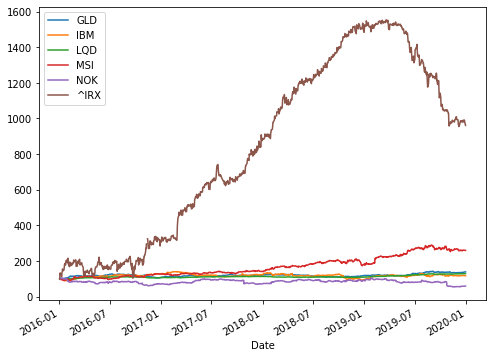

In [ ]:
#calculate and plot the returns.
(portfolio2 / portfolio2.iloc[0] * 100).plot(figsize=(8, 6))   # takes care of all plotting functions in pandas
rets2 = np.log(portfolio2 / portfolio2.shift(1))
rets2.head()

In [ ]:
def func_minimize_weights2(weights2):
  return np.sum(portfolio2@weights2)

bnds2=tuple((0,1) for weights2 in range (numassets2))


cons2=({'type':'eq','fun':lambda weights2:np.sum(weights2)-1},{'type':'eq','fun':lambda weights2:np.sum(portfolio2@weights2)-100000})
res2=sco.minimize(func_minimize_weights2,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds2,constraints=cons2)
opts2=sco.minimize(func_minimize_weights2,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds2,constraints=cons2)
weights2=opts2['x']
print('portfolio sum=' ,1.815*np.sum(portfolio2@opts2['x']).round(3))
print('weights=',opts2['x'])
sum(weights2)
sum(weights2)


portfolio sum= 181500.0
weights= [0.2421761  0.22893603 0.21482638 0.20717133 0.0565039  0.05038626]


1.0

In [ ]:
port2=portfolio2@weights2
port2.head()

Date
2016-01-04    80.231216
2016-01-05    80.159726
2016-01-06    80.308039
2016-01-07    80.062020
2016-01-08    79.798079
dtype: float64

In [ ]:
# Sum of the mean
np.sum(rets2.mean()*weights2)*252 

0.11151998893728851

In [ ]:
# calculate variance
var=weights2.T@(rets2.cov()*252@weights2)   
var

0.007683304267795871

In [ ]:
# calculate volatility 
# standard deviation - volatility
std=np.sqrt(var); std   

0.08765445948607448

The volatility for the portfolio with free risk asset is lower compared to portfolio without free risk asset.

Question 5

**For the year 2016**

In [ ]:
#downloading and reading data
import yfinance as yf
symbols_1=['NOK', 'CVX' ,'MSI', 'IBM', 'BP','SHEL']
numassets_1=len(symbols_1)
port1=yf.download (symbols_1,start="2016-01-01",end="2019-12-31")

[*********************100%***********************]  6 of 6 completed


In [ ]:
port1 = port1.dropna()     


In [ ]:
port1 = pd.DataFrame()


In [ ]:
returns1 = pd.DataFrame()

In [ ]:
returns1 = returns1.dropna()